In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.datasets import cifar10
import matplotlib.pyplot as plt
import keras


In [2]:
(train_images, train_labels),(test_images, test_labels) = cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [3]:
train_images.shape

(50000, 32, 32, 3)

In [4]:
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [5]:
labels = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [6]:
len(labels)

10

In [7]:
img = train_images[0]

In [8]:
img.shape

(32, 32, 3)

In [9]:
train_labels[0]

array([6], dtype=uint8)

In [11]:
labels[6]

'frog'

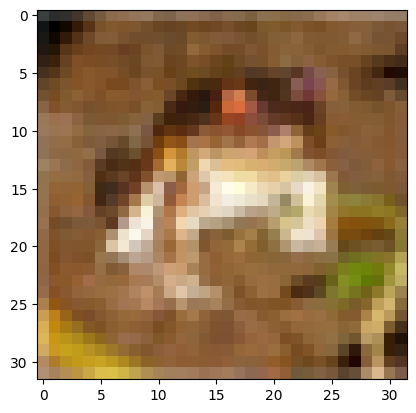

In [12]:
plt.imshow(img)

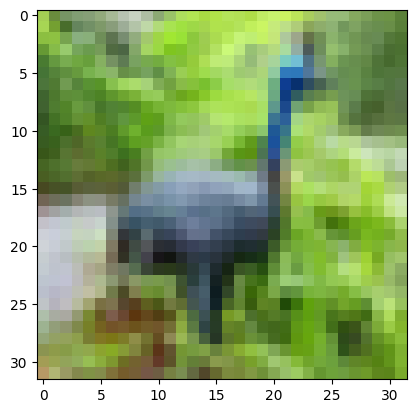

In [13]:
plt.imshow(train_images[6])

In [14]:
train_labels[6]

array([2], dtype=uint8)

In [15]:
labels[2]

'bird'

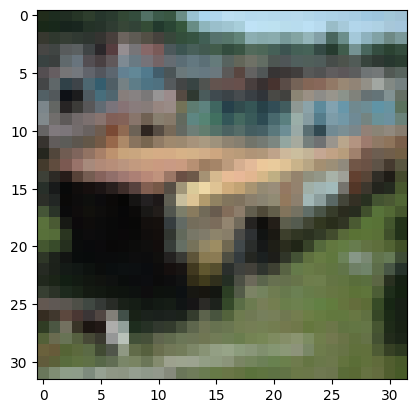

In [16]:
plt.imshow(train_images[97])

In [17]:
train_labels[97]

array([1], dtype=uint8)

In [18]:
j = 0
for i in train_labels:

  if i == 10:
    print(i,' - ', j)
    break
  j += 1


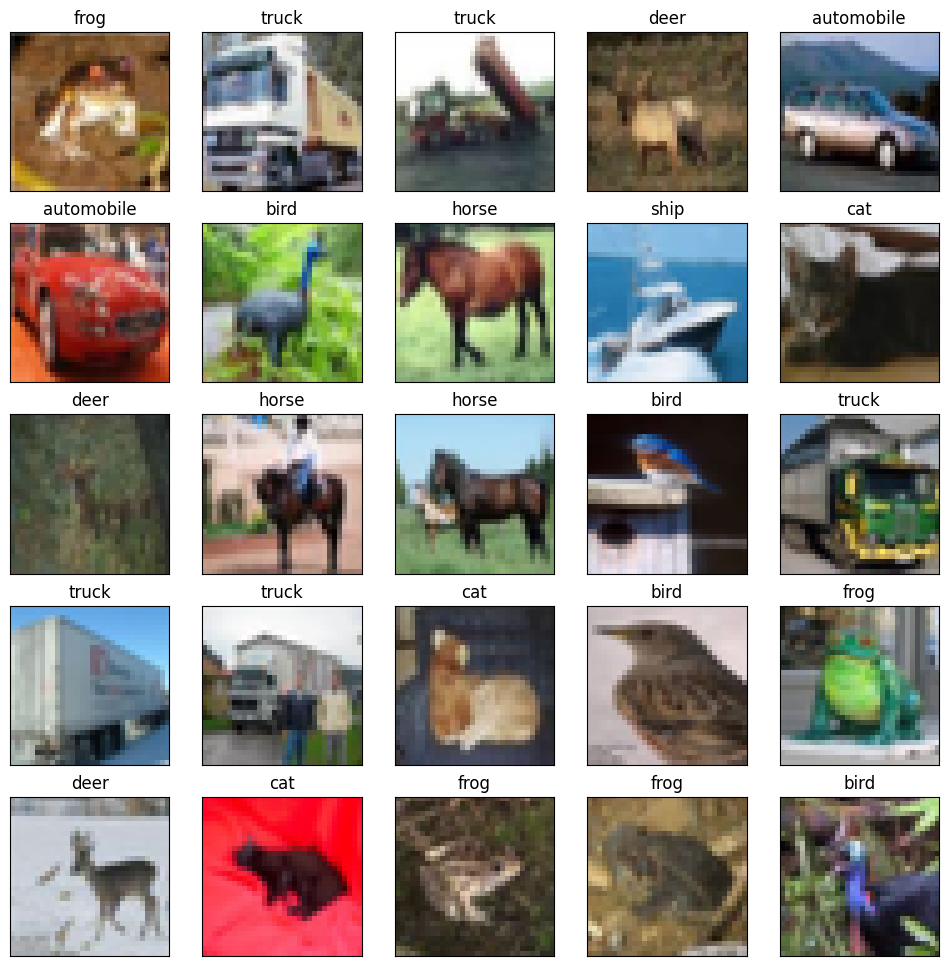

In [19]:
plt.figure(figsize=(12,12))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.title(labels[int(train_labels[i])])
  plt.imshow(train_images[i])

In [20]:
train_ds = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
test_ds = tf.data.Dataset.from_tensor_slices((test_images, test_labels))

In [21]:
train_ds

<_TensorSliceDataset element_spec=(TensorSpec(shape=(32, 32, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(1,), dtype=tf.uint8, name=None))>

In [22]:
def process_image(image, label):
  image = tf.image.per_image_standardization(image)
  image = tf.image.resize(image,(64,64))
  return image,label

In [23]:
train_ds_size = tf.data.experimental.cardinality(train_ds).numpy()
test_ds_size = tf.data.experimental.cardinality(test_ds).numpy()
print('Train size:', train_ds_size)
print('Test size:', test_ds_size)

Train size: 50000
Test size: 10000


In [24]:
train_ds = (train_ds.map(process_image).shuffle(buffer_size=train_ds_size).batch(batch_size = 32,drop_remainder=True))

test_ds = (test_ds.map(process_image).shuffle(buffer_size=test_ds_size).batch(batch_size = 32,drop_remainder=True))

In [25]:
train_ds

<_BatchDataset element_spec=(TensorSpec(shape=(32, 64, 64, 3), dtype=tf.float32, name=None), TensorSpec(shape=(32, 1), dtype=tf.uint8, name=None))>

In [26]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters = 128, kernel_size = (11,11),strides = (4,4), activation = 'relu', input_shape=(64,64,3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Conv2D(filters = 256, kernel_size = (5,5),strides = (1,1), activation = 'relu', padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3)),
    keras.layers.Conv2D(filters = 256, kernel_size = (3,3),strides = (1,1), activation = 'relu', padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters = 256, kernel_size = (1,1),strides = (1,1), activation = 'relu', padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters = 256, kernel_size = (1,1),strides = (1,1), activation = 'relu', padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(1024, activation = 'relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1024, activation = 'relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation = 'softmax')
    ])

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 14, 14, 128)       46592     
                                                                 
 batch_normalization (Batch  (None, 14, 14, 128)       512       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 7, 7, 128)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 256)         819456    
                                                                 
 batch_normalization_1 (Bat  (None, 7, 7, 256)         1024      
 chNormalization)                                                
                                                        

In [28]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = tf.optimizers.SGD(learning_rate = 0.001), metrics = ['accuracy'])

In [ ]:
history = model.fit(train_ds, epochs = 30, validation_data = test_ds)

Epoch 1/30
1562/1562 [==============================] - 25s 9ms/step - loss: 2.1298 - accuracy: 0.2500 - val_loss: 1.6211 - val_accuracy: 0.4270
Epoch 2/30
1562/1562 [==============================] - 20s 9ms/step - loss: 1.7195 - accuracy: 0.3781 - val_loss: 1.4404 - val_accuracy: 0.4861
Epoch 3/30
1562/1562 [==============================] - 19s 9ms/step - loss: 1.5419 - accuracy: 0.4432 - val_loss: 1.3396 - val_accuracy: 0.5210
Epoch 4/30
1562/1562 [==============================] - 20s 10ms/step - loss: 1.4145 - accuracy: 0.4913 - val_loss: 1.2414 - val_accuracy: 0.5565
Epoch 5/30
1562/1562 [==============================] - 17s 8ms/step - loss: 1.3051 - accuracy: 0.5339 - val_loss: 1.1808 - val_accuracy: 0.5770
Epoch 6/30
1562/1562 [==============================] - 16s 8ms/step - loss: 1.2186 - accuracy: 0.5651 - val_loss: 1.1155 - val_accuracy: 0.6024
Epoch 7/30
1562/1562 [==============================] - 18s 8ms/step - loss: 1.1466 - accuracy: 0.5932 - val_loss: 1.0642 - val_a